## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [34]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [35]:
# df.columns = ["DATE", "TAG", "POSTS"]
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [36]:
df.shape

(2272, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [37]:
df.count()

DATE     2272
TAG      2272
POSTS    2272
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [38]:
by_tag = df.groupby("TAG").sum().sort_values("POSTS", ascending=False)
by_tag.head(10)

,POSTS
TAG,
javascript,2353943
python,1918044
java,1835735
c#,1529781
php,1431867
c++,759119
r,442425
c,376789
swift,310947


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [39]:
by_month = df.groupby("TAG").count().sort_values("DATE", ascending=False)
by_month.head(10)

,DATE,POSTS
TAG,,
c#,165,165
assembly,164,164
c,164,164
c++,164,164
delphi,164,164
java,164,164
javascript,164,164
perl,164,164
php,164,164


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [44]:
# we already did it by using ", parse_dates=["DATE"]"
# print(type(df.DATE[1])) --> <class 'pandas._libs.tslibs.timestamps.Timestamp'>

# alternatively:
df.DATE = pd.to_datetime(df.DATE)



In [45]:
print(type(df.DATE[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [46]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


## Data Manipulation



In [57]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [58]:
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [59]:
print(df.shape)
print(df.columns)
df.head()

(2272, 3)
Index(['DATE', 'TAG', 'POSTS'], dtype='object')


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


In [63]:
pivoted_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
print(pivoted_df.shape)
print(pivoted_df.index)
pivoted_df.head()

(165, 14)
DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DATE', length=165, freq=None)


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [70]:
# pivoted_df.tail()

pivoted_df.count()

TAG
assembly      165
c             165
c#            165
c++           165
delphi        165
go            165
java          165
javascript    165
perl          165
php           165
python        165
r             165
ruby          165
swift         165
dtype: int64

In [75]:
pivoted_df.fillna(0, inplace=True)

In [80]:
pivoted_df.isna().values.any()

False

In [76]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [86]:
df[df.TAG == "java"].head()
df[df.TAG == "java"].POSTS

6        222
17      1136
29      1154
40       958
52       829
        ... 
2208    8283
2222    7552
2236    7746
2250    7365
2264    9386
Name: POSTS, Length: 164, dtype: int64

In [100]:
x=df[df.TAG == "java"].DATE
y=df[df.TAG == "java"].POSTS
print(len(x), len(y))
# plt.plot(x, y)

164 164


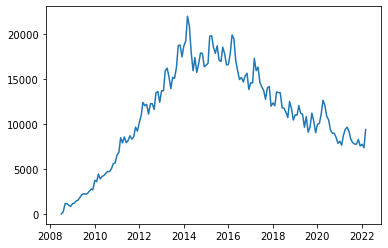

In [99]:
plt.plot(pivoted_df.index, pivoted_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 